In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error,mean_absolute_error

import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts

In [3]:
raw_data = pd.read_csv("5 years data 1.csv")
df = raw_data.copy()

In [4]:
df.dropna(inplace = True)

In [5]:
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)
 
print(df)

     sum_amt         date
0     26937.6  2019-03-01
1    149481.4  2019-04-01
2   179022.77  2019-05-01
3    62621.58  2019-06-01
4    60998.88  2019-07-01
5    50433.76  2019-08-01
6   241557.52  2019-09-01
7   205239.96  2019-10-01
8   162870.32  2019-11-01
9   128013.43  2019-12-01
10  157393.36  2020-01-01
11  179746.24  2020-02-01
12   72187.95  2020-03-01
13    5876.28  2020-04-01
14    6164.53  2020-05-01
15   31677.28  2020-06-01
16   11632.89  2020-07-01
17   19960.32  2020-08-01
18   60483.36  2020-09-01
19  115295.52  2020-10-01
20   27484.56  2020-11-01
21   73153.04  2020-12-01
22    18575.6  2021-01-01
23   31320.64  2021-02-01
24    78841.2  2021-03-01
25   69798.58  2021-04-01
26  194990.33  2021-05-01
27  373109.16  2021-06-01
28  171631.92  2021-07-01
29      77376  2021-08-01
30  273460.68  2021-09-01
31  354284.27  2021-10-01
32  395910.96  2021-11-01
33  315234.69  2021-12-01
34  272818.27  2022-01-01
35  559425.89  2022-02-01
36  472742.88  2022-03-01
37  218053.6

In [6]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date',inplace=True)

In [7]:
df['sum_amt '] = df['sum_amt '].astype(float)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 62 entries, 2019-03-01 to 2024-04-01
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sum_amt   62 non-null     float64
dtypes: float64(1)
memory usage: 992.0 bytes


<Axes: xlabel='date'>

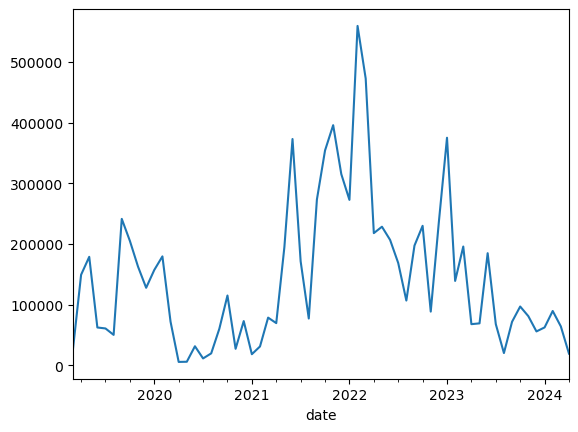

In [9]:
df['sum_amt '].plot()

In [10]:
# Extract month, quarter, and year
df['month'] = df.index.month
df['quarter'] = df.index.quarter
df['year'] = df.index.year

In [11]:
# Create a date range for future dates from January 1, 2029, to June 1, 2029
future_dates = pd.date_range(start='2024-05-01', end='2024-10-01', freq='MS')

# Create an empty DataFrame with the extended index
future_data = pd.DataFrame(index=future_dates)

# Fill empty values for sum_amount, month, quarter, and year with NaNs
future_data['sum_amt '] = 0
future_data['month'] = future_dates.month
future_data['quarter'] = future_dates.quarter 
future_data['year'] = future_dates.year

# Combine the original dataset with the extended future dataset
extended_data = pd.concat([df, future_data])

In [12]:
train, test = extended_data.loc[:'2023-09-01'], extended_data.loc['2023-10-01':]

In [13]:
sts.adfuller(train['sum_amt '])

(-2.20922033570035,
 0.20291604296912574,
 5,
 49,
 {'1%': -3.5714715250448363,
  '5%': -2.922629480573571,
  '10%': -2.5993358475635153},
 1112.6742770555757)

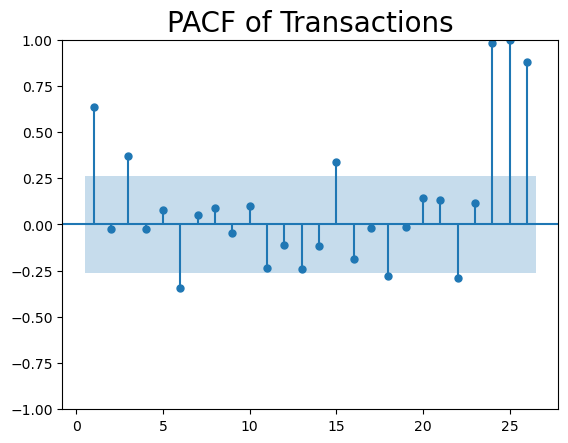

In [14]:
sgt.plot_pacf(train['sum_amt '],zero=False,lags=26,method='ols')
plt.title('PACF of Transactions',size=20)
plt.show()

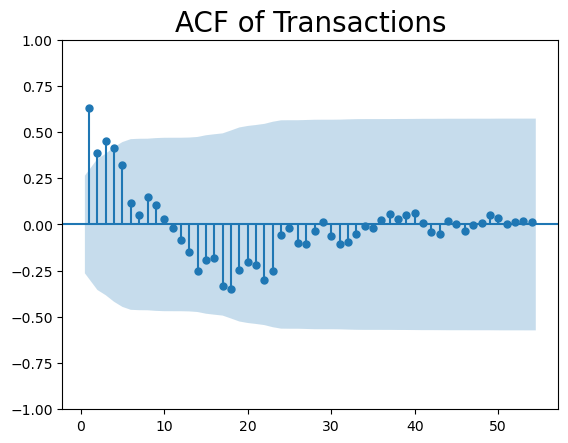

In [15]:
sgt.plot_acf(train['sum_amt '],zero=False,lags=54)
plt.title('ACF of Transactions',size=20)
plt.show()

In [16]:
test

,sum_amt,month,quarter,year
2023-10-01,97156.92,10,4,2023
2023-11-01,81293.84,11,4,2023
2023-12-01,56113.86,12,4,2023
2024-01-01,62707.23,1,1,2024
2024-02-01,89789.19,2,1,2024
2024-03-01,64405.71,3,1,2024
2024-04-01,19545.40,4,2,2024
2024-05-01,0.00,5,2,2024
2024-06-01,0.00,6,2,2024
2024-07-01,0.00,7,3,2024


In [17]:
model_1 = ARIMA(train['sum_amt '], order=(22,1,22),exog = train[['month', 'quarter', 'year']])
results_1 = model_1.fit()
# results_1.summary()

D:\Users\vtpavithra\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Users\vtpavithra\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Users\vtpavithra\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Users\vtpavithra\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [18]:
start_date = '2023-10-01'
end_date = '2024-10-01'

predictions_1 = results_1.predict(start=len(train), end=len(train)+len(test)-1,exog=test[['month', 'quarter', 'year']][start_date:end_date])

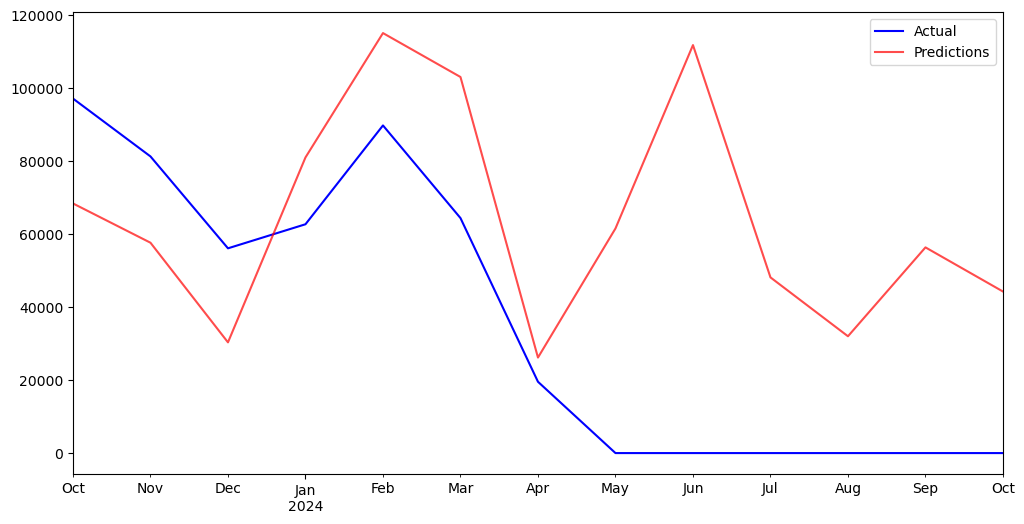

In [19]:
test['sum_amt '].plot(figsize=(12,6),color='blue',label='Actual')
predictions_1.plot(color='red',alpha=0.7,label='Predictions')
plt.legend()
plt.show()

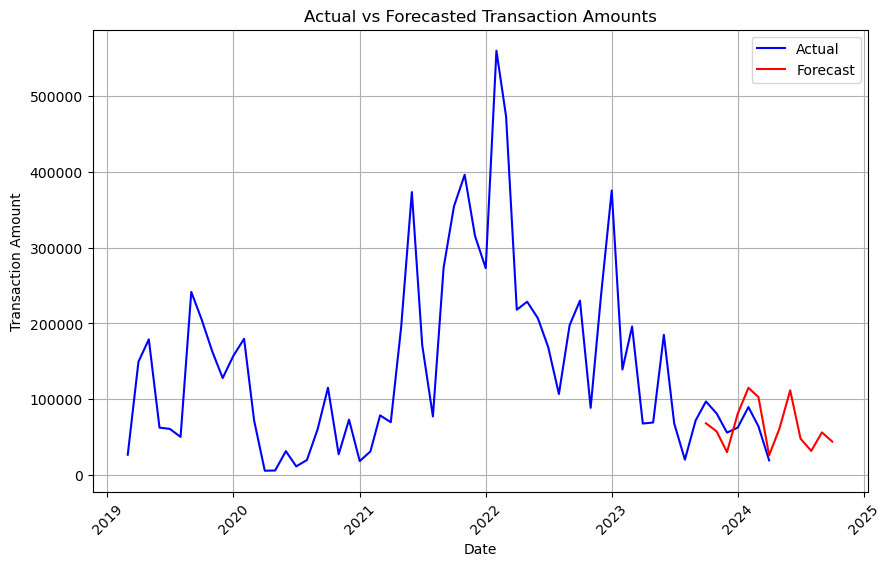

In [20]:
# Plot actual and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(extended_data.index[:-6], extended_data['sum_amt '][:-6], label='Actual', color='blue')
plt.plot(test.index, predictions_1, label='Forecast', color='red')
plt.title('Actual vs Forecasted Transaction Amounts')
plt.xlabel('Date')
plt.ylabel('Transaction Amount')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [379]:
print('RMSE: ',np.sqrt(mean_squared_error(test['sum_amt '][:-6],predictions_1[:-6])))

RMSE:  25534.942849889576


In [380]:
test['sum_amt '][:-6].mean()

67287.45

In [381]:
df.describe()

,sum_amt,month,quarter,year
count,62.000000,62.000000,62.000000,62.000000
mean,145725.918065,6.403226,2.467742,2021.258065
std,121339.223526,3.466276,1.126692,1.535754
min,5876.280000,1.000000,1.000000,2019.000000
25%,62642.992500,3.250000,1.250000,2020.000000
50%,102064.005000,6.000000,2.000000,2021.000000
75%,203321.297500,9.000000,3.000000,2022.750000
max,559425.890000,12.000000,4.000000,2024.000000


In [382]:
# Calculate mean directional accuracy (MDA)

def calculate_mean_directional_accuracy(actual, forecast):
    # Count the number of correct directional forecasts
    correct_direction = np.sum(np.sign(actual.diff().dropna()) == np.sign(forecast.diff().dropna()))
    
    # Total number of directional forecasts
    total_directional_forecasts = len(actual) - 1
    
    # Mean directional accuracy (MDA)
    mda = correct_direction / total_directional_forecasts
    
    return mda

mda = calculate_mean_directional_accuracy(test['sum_amt '][:-6],predictions_1[:-6])
print("Mean Directional Accuracy (MDA):", mda)

Mean Directional Accuracy (MDA): 1.0


In [383]:
predictions_1

2023-10-01     68410.993739
2023-11-01     57648.259620
2023-12-01     30341.354330
2024-01-01     81020.196954
2024-02-01    115099.127094
2024-03-01    103066.016470
2024-04-01     26178.074959
2024-05-01     61554.441241
2024-06-01    111809.647236
2024-07-01     48143.156131
2024-08-01     32012.099924
2024-09-01     56370.584692
2024-10-01     44273.354847
Freq: MS, Name: predicted_mean, dtype: float64

In [384]:
train.shape

(55, 4)

In [385]:
test.shape

(13, 4)